In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Download and extract Iam word Data


In [ ]:
!ls /content/drive/MyDrive/521\ ML\ \ final\ project/dataset/iam
!cp /content/drive/MyDrive/521\ ML\ \ final\ project/dataset/iam/words.tgz  /
!mkdir -p /words
!tar xvzf /words.tgz -C /words
!cp /content/drive/MyDrive/521\ ML\ \ final\ project/dataset/iam/ascii.tgz  /
!mkdir -p /words_label
!tar xvzf /ascii.tgz -C /words_label

Streaming output truncated to the last 5000 lines.
r06/r06-137/r06-137-06-01.png
r06/r06-137/r06-137-06-02.png
r06/r06-137/r06-137-06-03.png
r06/r06-137/r06-137-06-04.png
r06/r06-137/r06-137-06-05.png
r06/r06-137/r06-137-06-06.png
r06/r06-137/r06-137-06-07.png
r06/r06-137/r06-137-06-08.png
r06/r06-137/r06-137-07-00.png
r06/r06-137/r06-137-07-01.png
r06/r06-137/r06-137-07-02.png
r06/r06-137/r06-137-07-03.png
r06/r06-137/r06-137-07-04.png
r06/r06-137/r06-137-07-05.png
r06/r06-137/r06-137-07-06.png
r06/r06-137/r06-137-07-07.png
r06/r06-137/r06-137-07-08.png
r06/r06-137/r06-137-07-09.png
r06/r06-137/r06-137-07-10.png
r06/r06-137/r06-137-07-11.png
r06/r06-137/r06-137-07-12.png
r06/r06-137/r06-137-08-00.png
r06/r06-137/r06-137-08-01.png
r06/r06-137/r06-137-08-02.png
r06/r06-137/r06-137-08-03.png
r06/r06-137/r06-137-08-04.png
r06/r06-137/r06-137-08-05.png
r06/r06-137/r06-137-08-06.png
r06/r06-137/r06-137-08-07.png
r06/r06-137/r06-137-08-08.png
r06/r06-137/r06-137-08-09.png
r06/r06-137/r06-137

./
forms.txt
lines.txt
words.txt
sentences.txt


In [ ]:
%%capture
!rm -r /formsA-D.tgz
!cp /content/drive/MyDrive/521\ ML\ \ final\ project/dataset/iam/formsA-D.tgz  /
!cp /content/drive/MyDrive/521\ ML\ \ final\ project/dataset/iam/formsE-H.tgz  /
!cp /content/drive/MyDrive/521\ ML\ \ final\ project/dataset/iam/formsI-Z.tgz  /
!rm -r /forms
!mkdir -p /forms
!tar xvzf /formsA-D.tgz -C /forms
!tar xvzf /formsE-H.tgz -C /forms
!tar xvzf /formsI-Z.tgz -C /forms

In [ ]:
!head -20 /words_label/words.txt

#--- words.txt ---------------------------------------------------------------#
#
# iam database word information
#
# format: a01-000u-00-00 ok 154 1 408 768 27 51 AT A
#
#     a01-000u-00-00  -> word id for line 00 in form a01-000u
#     ok              -> result of word segmentation
#                            ok: word was correctly
#                            er: segmentation of word can be bad
#
#     154             -> graylevel to binarize the line containing this word
#     1               -> number of components for this word
#     408 768 27 51   -> bounding box around this word in x,y,w,h format
#     AT              -> the grammatical tag for this word, see the
#                        file tagset.txt for an explanation
#     A               -> the transcription for this word
#
a01-000u-00-00 ok 154 408 768 27 51 AT A
a01-000u-00-01 ok 154 507 766 213 48 NN MOVE


In [ ]:
from tensorflow.keras.layers.experimental.preprocessing import StringLookup
from tensorflow import keras

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os

np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
base_path = "/words_label"
words_list = []

words = open(f"{base_path}/words.txt", "r").readlines()
for line in words:
    if line[0] == "#":
        continue
    if line.split(" ")[1] != "err":  # We don't need to deal with errored entries.
        words_list.append(line)

len(words_list)
words_list[0:10]


['a01-000u-00-00 ok 154 408 768 27 51 AT A\n',
 'a01-000u-00-01 ok 154 507 766 213 48 NN MOVE\n',
 'a01-000u-00-02 ok 154 796 764 70 50 TO to\n',
 'a01-000u-00-03 ok 154 919 757 166 78 VB stop\n',
 'a01-000u-00-04 ok 154 1185 754 126 61 NPT Mr.\n',
 'a01-000u-00-05 ok 154 1438 746 382 73 NP Gaitskell\n',
 'a01-000u-00-06 ok 154 1896 757 173 72 IN from\n',
 'a01-000u-01-00 ok 156 395 932 441 100 VBG nominating\n',
 'a01-000u-01-01 ok 156 901 958 147 79 DTI any\n',
 'a01-000u-01-02 ok 156 1112 958 208 42 AP more\n']

In [ ]:
np.random.shuffle(words_list)
words_list = words_list[0:10]
words_list[0:10]

['n04-218-02-01 ok 182 574 1270 244 54 VB continue\n',
 'n01-004-02-00 ok 182 331 1086 71 61 QL so\n',
 'f02-038-01-00 ok 203 368 927 149 81 DT this\n',
 'f04-011-07-03 ok 145 1013 2048 16 32 , ,\n',
 'e04-103-01-01 ok 174 471 916 205 123 VB plank\n',
 'h02-028-00-04 ok 190 1084 793 101 32 PP$ our\n',
 'j01-042-00-00 ok 178 402 778 145 44 CS Unless\n',
 'l04-071-04-07 ok 173 1435 1547 88 56 PP3A she\n',
 'm06-019-02-06 ok 190 1385 1136 252 62 NNS flymen\n',
 'a04-043-02-05 ok 186 1906 1113 59 68 INO of\n']

In [ ]:
split_idx = int(0.8 * len(words_list))
train_samples = words_list[:split_idx]
test_samples = words_list[split_idx:]

In [ ]:
val_split_idx = int(0.5 * len(test_samples))
validation_samples = test_samples[:val_split_idx]
test_samples = test_samples[val_split_idx:]

In [ ]:
len(test_samples)
# len(train_samples)/len(words_list)

1

In [ ]:
len(validation_samples)/len(words_list)

0.10000414696856598

In [ ]:
len(test_samples)/len(words_list)

0.10000414696856598

In [ ]:
assert len(words_list) == len(train_samples) + len(validation_samples) + len(
    test_samples
)

In [ ]:
print(f"Total training samples: {len(train_samples)}")
print(f"Total validation samples: {len(validation_samples)}")
print(f"Total test samples: {len(test_samples)}")

Total training samples: 8
Total validation samples: 1
Total test samples: 1


In [ ]:
base_image_path = os.path.join(base_path, "/words")
def get_image_paths_and_labels(samples):
    paths = []
    corrected_samples = []
    for (i, file_line) in enumerate(samples):
        line_split = file_line.strip()
        line_split = line_split.split(" ")

        # Each line split will have this format for the corresponding image:
        # part1/part1-part2/part1-part2-part3.png
        image_name = line_split[0]
        partI = image_name.split("-")[0]
        partII = image_name.split("-")[1]
        img_path = os.path.join(
            base_image_path, partI, partI + "-" + partII, image_name + ".png"
        )
        if os.path.getsize(img_path):
            paths.append(img_path)
            corrected_samples.append(file_line.split("\n")[0])
    return paths, corrected_samples
  


In [ ]:
train_img_paths, train_labels = get_image_paths_and_labels(train_samples)
validation_img_paths, validation_labels = get_image_paths_and_labels(validation_samples)
test_img_paths, test_labels = get_image_paths_and_labels(test_samples)
train_img_paths[0],train_labels[0]

('/words/n04/n04-218/n04-218-02-01.png',
 'n04-218-02-01 ok 182 574 1270 244 54 VB continue')

In [ ]:
bounding_boxes = {}
for idx,path in enumerate(train_img_paths):
  bounding_boxes[path] = "-".join(train_labels[idx].split(' ')[3:7])
bounding_boxes


{'/words/n04/n04-218/n04-218-02-01.png': '574-1270-244-54',
 '/words/n01/n01-004/n01-004-02-00.png': '331-1086-71-61',
 '/words/f02/f02-038/f02-038-01-00.png': '368-927-149-81',
 '/words/f04/f04-011/f04-011-07-03.png': '1013-2048-16-32',
 '/words/e04/e04-103/e04-103-01-01.png': '471-916-205-123',
 '/words/h02/h02-028/h02-028-00-04.png': '1084-793-101-32',
 '/words/j01/j01-042/j01-042-00-00.png': '402-778-145-44',
 '/words/l04/l04-071/l04-071-04-07.png': '1435-1547-88-56'}

In [ ]:
final_training_image_data = []
images = []
for idx,path in enumerate(train_img_paths):    
    form_image =  '/forms/'+ path.split('/')[3] +'.png'
    bounding_box = bounding_boxes[path]
    img = cv2.imread(form_image)
    
    x,y,w,h = [int(i) for i in bounding_box.split('-')]
    # cv2.rectangle(img, (x, y), (x + w, y + h), (255,0,0), 4)
    ROI = img[y:y+h, x:x+w]
    image_resize=cv2.resize(ROI,(200,300),interpolation=cv2.INTER_AREA)
    images.append(image_resize.shape)
    img_rgb = cv2.cvtColor(image_resize, cv2.COLOR_BGR2RGB)
    img_tensor = tf.convert_to_tensor(img_rgb, dtype=tf.float32)
    
    final_training_image_data.append(img_tensor)
    
    #Resize to respect the input_shape
    # inp = cv.resize(img, (width , height ))

    # Convert img to RGB
    # rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    

    # rgb_tensor = tf.convert_to_tensor(img, dtype=tf.float32)

In [ ]:
images

[(300, 200, 3),
 (300, 200, 3),
 (300, 200, 3),
 (300, 200, 3),
 (300, 200, 3),
 (300, 200, 3),
 (300, 200, 3),
 (300, 200, 3)]

{'/words/n04/n04-218/n04-218-02-01.png': '574-1270-244-54',
 '/words/n01/n01-004/n01-004-02-00.png': '331-1086-71-61',
 '/words/f02/f02-038/f02-038-01-00.png': '368-927-149-81',
 '/words/f04/f04-011/f04-011-07-03.png': '1013-2048-16-32',
 '/words/e04/e04-103/e04-103-01-01.png': '471-916-205-123',
 '/words/h02/h02-028/h02-028-00-04.png': '1084-793-101-32',
 '/words/j01/j01-042/j01-042-00-00.png': '402-778-145-44',
 '/words/l04/l04-071/l04-071-04-07.png': '1435-1547-88-56'}

In [ ]:
form_images = {}
for idx,path in enumerate(train_img_paths):
  form_images[path] = '/forms/'+ path.split('/')[3] +'.png'
final_training_image_paths = []
for idx,path in enumerate(train_img_paths):
  final_training_image_paths.append(tmp_training_image_paths[idx] +'+' + form_images[path])

final_training_image_paths



['/words/n04/n04-218/n04-218-02-01.png+574-1270-244-54+/forms/n04-218.png',
 '/words/n01/n01-004/n01-004-02-00.png+331-1086-71-61+/forms/n01-004.png',
 '/words/f02/f02-038/f02-038-01-00.png+368-927-149-81+/forms/f02-038.png',
 '/words/f04/f04-011/f04-011-07-03.png+1013-2048-16-32+/forms/f04-011.png',
 '/words/e04/e04-103/e04-103-01-01.png+471-916-205-123+/forms/e04-103.png',
 '/words/h02/h02-028/h02-028-00-04.png+1084-793-101-32+/forms/h02-028.png',
 '/words/j01/j01-042/j01-042-00-00.png+402-778-145-44+/forms/j01-042.png',
 '/words/l04/l04-071/l04-071-04-07.png+1435-1547-88-56+/forms/l04-071.png']

In [ ]:
# Find maximum length and the size of the vocabulary in the training data.
train_labels_cleaned = []
characters = set()
max_len = 0

for label in train_labels:
    label = label.split(" ")[-1].strip()
    for char in label:
        characters.add(char)

    max_len = max(max_len, len(label))
    train_labels_cleaned.append(label)

characters = sorted(list(characters))

print("Maximum length: ", max_len)
print("Vocab size: ", len(characters))

# Check some label samples.
train_labels_cleaned[:10]

Maximum length:  8
Vocab size:  16


['continue', 'so', 'this', ',', 'plank', 'our', 'Unless', 'she']

In [ ]:
def clean_labels(labels):
    cleaned_labels = []
    for label in labels:
        label = label.split(" ")[-1].strip()
        cleaned_labels.append(label)
    return cleaned_labels

train_labels_cleaned = clean_labels(train_labels)
validation_labels_cleaned = clean_labels(validation_labels)
test_labels_cleaned = clean_labels(test_labels)
train_labels_cleaned[0:5]

['continue', 'so', 'this', ',', 'plank']

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
# Mapping characters to integers.
char_to_num = StringLookup(vocabulary=list(characters), mask_token=None)
# Mapping integers back to original characters.
num_to_char = StringLookup(
    vocabulary=char_to_num.get_vocabulary(), mask_token=None, invert=True
)

In [ ]:

def distortion_free_resize(image, img_size):
    w, h = img_size
    image = tf.image.resize(image, size=(h, w), preserve_aspect_ratio=True)

    # Check tha amount of padding needed to be done.
    pad_height = h - tf.shape(image)[0]
    pad_width = w - tf.shape(image)[1]

    # Only necessary if you want to do same amount of padding on both sides.
    if pad_height % 2 != 0:
        height = pad_height // 2
        pad_height_top = height + 1
        pad_height_bottom = height
    else:
        pad_height_top = pad_height_bottom = pad_height // 2

    if pad_width % 2 != 0:
        width = pad_width // 2
        pad_width_left = width + 1
        pad_width_right = width
    else:
        pad_width_left = pad_width_right = pad_width // 2

    image = tf.pad(
        image,
        paddings=[
            [pad_height_top, pad_height_bottom],
            [pad_width_left, pad_width_right],
            [0, 0],
        ],
    )

    image = tf.transpose(image, perm=[1, 0, 2])
    image = tf.image.flip_left_right(image)
    return image


In [ ]:
train_img_paths, train_labels_cleaned,final_form_images,final_bounding_boxes

image_path = train_img_paths[0]
form_image = final_form_images[0]
bounding_box = final_bounding_boxes[0].split('-')
img = cv2.imread(form_image)

In [ ]:
batch_size = 64
padding_token = 99
image_width = 128
image_height = 32

import cv2 
def preprocess_image(image,img_size=(image_width, image_height)):
    # image = tf.image.decode_png(image, 1)
    image = distortion_free_resize(image, img_size)
    image = tf.cast(image, tf.float32) / 255.0
    return image


def vectorize_label(label):
    label = char_to_num(tf.strings.unicode_split(label, input_encoding="UTF-8"))
    length = tf.shape(label)[0]
    pad_amount = max_len - length
    label = tf.pad(label, paddings=[[0, pad_amount]], constant_values=padding_token)
    return label


def process_images_labels(image_path, label):
    image = preprocess_image(image_path)
    label = vectorize_label(label)
    return {"image": image, "label": label}


def prepare_dataset(image_paths, labels,):
    dataset = tf.data.Dataset.from_tensor_slices((image_paths, labels)).map(
        process_images_labels, num_parallel_calls=AUTOTUNE
    )
    return dataset.batch(batch_size).cache().prefetch(AUTOTUNE)


In [ ]:
train_ds = prepare_dataset(final_training_image_data, train_labels_cleaned)
# validation_ds = prepare_dataset(validation_img_paths, validation_labels_cleaned)
# test_ds = prepare_dataset(test_img_paths, test_labels_cleaned)

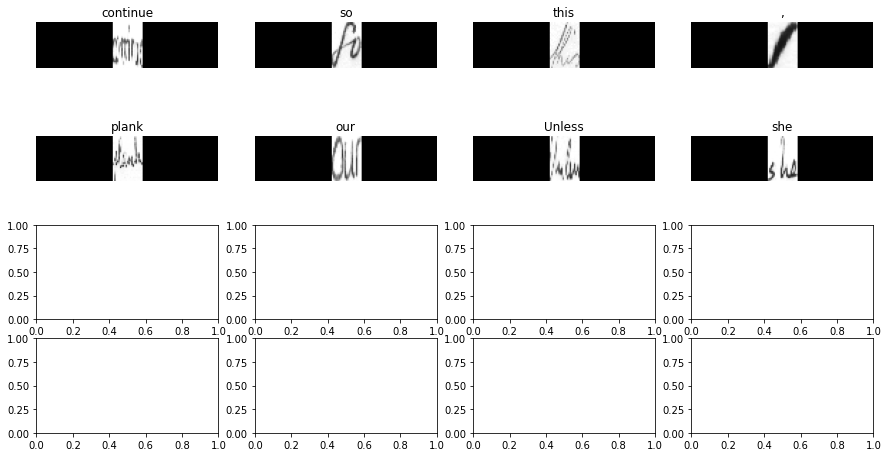

In [ ]:
for data in train_ds.take(1):
    images, labels = data["image"], data["label"]

    _, ax = plt.subplots(4, 4, figsize=(15, 8))

    for i in range(8):
        img = images[i]
        img = tf.image.flip_left_right(img)
        img = tf.transpose(img, perm=[1, 0, 2])
        img = (img * 255.0).numpy().clip(0, 255).astype(np.uint8)
        img = img[:, :, 0]

        # Gather indices where label!= padding_token.
        label = labels[i]
        indices = tf.gather(label, tf.where(tf.math.not_equal(label, padding_token)))
        # Convert to string.
        label = tf.strings.reduce_join(num_to_char(indices))
        label = label.numpy().decode("utf-8")

        ax[i // 4, i % 4].imshow(img, cmap="gray")
        ax[i // 4, i % 4].set_title(label)
        ax[i // 4, i % 4].axis("off")

plt.show()

In [ ]:

class CTCLayer(keras.layers.Layer):
    def __init__(self, name=None):
        super().__init__(name=name)
        self.loss_fn = keras.backend.ctc_batch_cost

    def call(self, y_true, y_pred):
        batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
        input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
        label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")

        input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
        label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")
        loss = self.loss_fn(y_true, y_pred, input_length, label_length)
        self.add_loss(loss)

        # At test time, just return the computed predictions.
        return y_pred


def build_model():
    # Inputs to the model
    input_img = keras.Input(shape=(image_width, image_height, 1), name="image")
    labels = keras.layers.Input(name="label", shape=(None,))

    # First conv block.
    x = keras.layers.Conv2D(
        32,
        (3, 3),
        activation="relu",
        kernel_initializer="he_normal",
        padding="same",
        name="Conv1",
    )(input_img)
    x = keras.layers.MaxPooling2D((2, 2), name="pool1")(x)

    # Second conv block.
    x = keras.layers.Conv2D(
        64,
        (3, 3),
        activation="relu",
        kernel_initializer="he_normal",
        padding="same",
        name="Conv2",
    )(x)
    x = keras.layers.MaxPooling2D((2, 2), name="pool2")(x)

    # We have used two max pool with pool size and strides 2.
    # Hence, downsampled feature maps are 4x smaller. The number of
    # filters in the last layer is 64. Reshape accordingly before
    # passing the output to the RNN part of the model.
    new_shape = ((image_width // 4), (image_height // 4) * 64)
    x = keras.layers.Reshape(target_shape=new_shape, name="reshape")(x)
    x = keras.layers.Dense(64, activation="relu", name="dense1")(x)
    x = keras.layers.Dropout(0.2)(x)

    # RNNs.
    x = keras.layers.Bidirectional(
        keras.layers.LSTM(128, return_sequences=True, dropout=0.25)
    )(x)
    x = keras.layers.Bidirectional(
        keras.layers.LSTM(64, return_sequences=True, dropout=0.25)
    )(x)

    # +2 is to account for the two special tokens introduced by the CTC loss.
    # The recommendation comes here: https://git.io/J0eXP.
    x = keras.layers.Dense(
        len(char_to_num.get_vocabulary()) + 2, activation="softmax", name="dense2"
    )(x)

    # Add CTC layer for calculating CTC loss at each step.
    output = CTCLayer(name="ctc_loss")(labels, x)

    # Define the model.
    model = keras.models.Model(
        inputs=[input_img, labels], outputs=output, name="handwriting_recognizer"
    )
    # Optimizer.
    opt = keras.optimizers.Adam()
    # Compile the model and return.
    model.compile(optimizer=opt)
    return model


# Get the model.
model = build_model()
model.summary()

Model: "handwriting_recognizer"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 image (InputLayer)             [(None, 128, 32, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 Conv1 (Conv2D)                 (None, 128, 32, 32)  320         ['image[0][0]']                  
                                                                                                  
 pool1 (MaxPooling2D)           (None, 64, 16, 32)   0           ['Conv1[0][0]']                  
                                                                                                  
 Conv2 (Conv2D)                 (None, 64, 16, 64)   18496       ['pool1[0][0

In [ ]:
validation_images = []
validation_labels = []

for batch in validation_ds:
    validation_images.append(batch["image"])
    validation_labels.append(batch["label"])
validation_images[0],validation_labels[0]

(<tf.Tensor: shape=(64, 128, 32, 1), dtype=float32, numpy=
 array([[[[0.        ],
          [0.        ],
          [0.        ],
          ...,
          [0.        ],
          [0.        ],
          [0.        ]],
 
         [[0.        ],
          [0.        ],
          [0.        ],
          ...,
          [0.        ],
          [0.        ],
          [0.        ]],
 
         [[0.        ],
          [0.        ],
          [0.        ],
          ...,
          [0.        ],
          [0.        ],
          [0.        ]],
 
         ...,
 
         [[0.        ],
          [0.        ],
          [0.        ],
          ...,
          [0.        ],
          [0.        ],
          [0.        ]],
 
         [[0.        ],
          [0.        ],
          [0.        ],
          ...,
          [0.        ],
          [0.        ],
          [0.        ]],
 
         [[0.        ],
          [0.        ],
          [0.        ],
          ...,
          [0.        ],
    

In [ ]:

def calculate_edit_distance(labels, predictions):
    # Get a single batch and convert its labels to sparse tensors.
    saprse_labels = tf.cast(tf.sparse.from_dense(labels), dtype=tf.int64)

    # Make predictions and convert them to sparse tensors.
    input_len = np.ones(predictions.shape[0]) * predictions.shape[1]
    predictions_decoded = keras.backend.ctc_decode(
        predictions, input_length=input_len, greedy=True
    )[0][0][:, :max_len]
    sparse_predictions = tf.cast(
        tf.sparse.from_dense(predictions_decoded), dtype=tf.int64
    )

    # Compute individual edit distances and average them out.
    edit_distances = tf.edit_distance(
        sparse_predictions, saprse_labels, normalize=False
    )
    return tf.reduce_mean(edit_distances)


class EditDistanceCallback(keras.callbacks.Callback):
    def __init__(self, pred_model):
        super().__init__()
        self.prediction_model = pred_model

    def on_epoch_end(self, epoch, logs=None):
        edit_distances = []

        for i in range(len(validation_images)):
            labels = validation_labels[i]
            predictions = self.prediction_model.predict(validation_images[i])
            edit_distances.append(calculate_edit_distance(labels, predictions).numpy())

        print(
            f"Mean edit distance for epoch {epoch + 1}: {np.mean(edit_distances):.4f}"
        )


In [ ]:
epochs = 10  # To get good results this should be at least 50.

model = build_model()
prediction_model = keras.models.Model(
    model.get_layer(name="image").input, model.get_layer(name="dense2").output
)
edit_distance_callback = EditDistanceCallback(prediction_model)

# Train the model.
history = model.fit(
    train_ds,
    validation_data=validation_ds,
    epochs=epochs,
    callbacks=[edit_distance_callback],
)


Epoch 1/10
2/2 [==============================] - 2s 92ms/step
Mean edit distance for epoch 1: 20.7180
1206/1206 [==============================] - 986s 768ms/step - loss: 13.9126 - val_loss: 12.1906
Epoch 2/10
2/2 [==============================] - 0s 59ms/step
Mean edit distance for epoch 2: 20.1563
1206/1206 [==============================] - 835s 693ms/step - loss: 10.9471 - val_loss: 10.0555
Epoch 3/10
2/2 [==============================] - 0s 64ms/step
Mean edit distance for epoch 3: 19.9364
1206/1206 [==============================] - 829s 687ms/step - loss: 9.4996 - val_loss: 8.7971
Epoch 4/10
2/2 [==============================] - 0s 61ms/step
Mean edit distance for epoch 4: 19.6150
1206/1206 [==============================] - 836s 693ms/step - loss: 8.3935 - val_loss: 7.4083
Epoch 5/10
2/2 [==============================] - 0s 61ms/step
Mean edit distance for epoch 5: 18.8739
1206/1206 [==============================] - 832s 690ms/step - loss: 7.1637 - val_loss: 5.9434
Epoch 

In [ ]:
model.save('/ohtr')
# import shutil
# shutil.copy('source','destination')

In [ ]:
# import shutil
# shutil.copy('/ohtr','/content/drive/MyDrive/521\ ML\ \ final\ project/model/cnn_ohtr')
!cp -av /ohtr /content/drive/MyDrive/521\ ML\ \ final\ project/model/cnn_ohtr/

'/ohtr' -> '/content/drive/MyDrive/521 ML  final project/model/cnn_ohtr/ohtr'
'/ohtr/variables' -> '/content/drive/MyDrive/521 ML  final project/model/cnn_ohtr/ohtr/variables'
'/ohtr/variables/variables.data-00000-of-00001' -> '/content/drive/MyDrive/521 ML  final project/model/cnn_ohtr/ohtr/variables/variables.data-00000-of-00001'
'/ohtr/variables/variables.index' -> '/content/drive/MyDrive/521 ML  final project/model/cnn_ohtr/ohtr/variables/variables.index'
'/ohtr/assets' -> '/content/drive/MyDrive/521 ML  final project/model/cnn_ohtr/ohtr/assets'
'/ohtr/saved_model.pb' -> '/content/drive/MyDrive/521 ML  final project/model/cnn_ohtr/ohtr/saved_model.pb'
'/ohtr/keras_metadata.pb' -> '/content/drive/MyDrive/521 ML  final project/model/cnn_ohtr/ohtr/keras_metadata.pb'


2/2 [==============================] - 1s 341ms/step


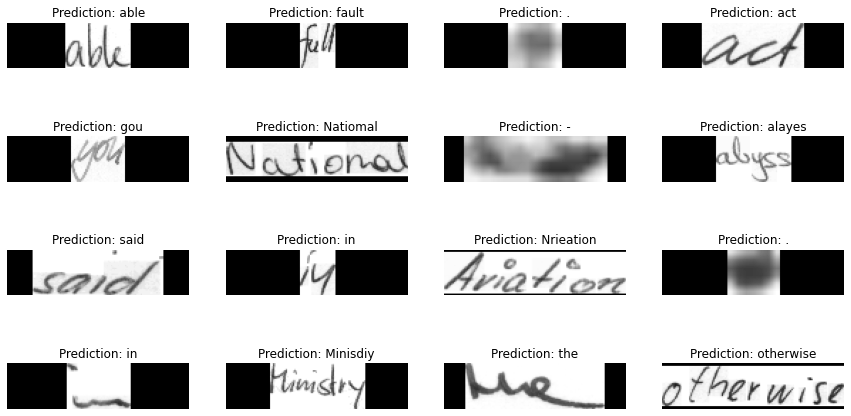

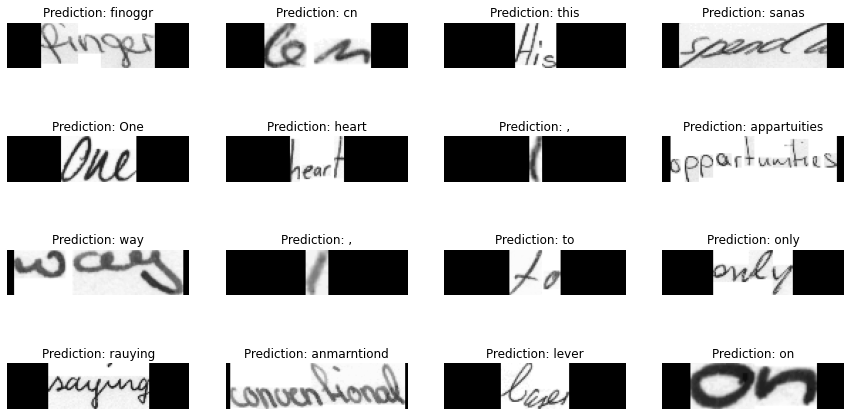

In [ ]:

# A utility function to decode the output of the network.
def decode_batch_predictions(pred):
    input_len = np.ones(pred.shape[0]) * pred.shape[1]
    # Use greedy search. For complex tasks, you can use beam search.
    results = keras.backend.ctc_decode(pred, input_length=input_len, greedy=True)[0][0][
        :, :max_len
    ]
    # Iterate over the results and get back the text.
    output_text = []
    for res in results:
        res = tf.gather(res, tf.where(tf.math.not_equal(res, -1)))
        res = tf.strings.reduce_join(num_to_char(res)).numpy().decode("utf-8")
        output_text.append(res)
    return output_text


#  Let's check results on some test samples.
for batch in test_ds.take(2):
    batch_images = batch["image"]
    _, ax = plt.subplots(4, 4, figsize=(15, 8))

    preds = prediction_model.predict(batch_images)
    pred_texts = decode_batch_predictions(preds)

    for i in range(16):
        img = batch_images[i]
        img = tf.image.flip_left_right(img)
        img = tf.transpose(img, perm=[1, 0, 2])
        img = (img * 255.0).numpy().clip(0, 255).astype(np.uint8)
        img = img[:, :, 0]

        title = f"Prediction: {pred_texts[i]}"
        ax[i // 4, i % 4].imshow(img, cmap="gray")
        ax[i // 4, i % 4].set_title(title)
        ax[i // 4, i % 4].axis("off")

plt.show()